<a href="https://colab.research.google.com/github/Mariehf64/fev23cda_french_industry/blob/GPS/EDA_GPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **EDA du dataset name_geographic_information**

In [ ]:
# importation des données 
source=pd.read_csv('/content/name_geographic_information.csv')

# création d'un copie 
df=source.copy()

In [ ]:
# premières analyses
display(df.head())
display( df.info())

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EU_circo                36840 non-null  object 
 1   code_région             36840 non-null  int64  
 2   nom_région              36840 non-null  object 
 3   chef.lieu_région        36840 non-null  object 
 4   numéro_département      36840 non-null  object 
 5   nom_département         36840 non-null  object 
 6   préfecture              36840 non-null  object 
 7   numéro_circonscription  36840 non-null  int64  
 8   nom_commune             36840 non-null  object 
 9   codes_postaux           36840 non-null  object 
 10  code_insee              36840 non-null  int64  
 11  latitude                33911 non-null  float64
 12  longitude               33999 non-null  object 
 13  éloignement             33878 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

None

**ANALYSE DES DOUBLONS**



In [ ]:
df.duplicated().sum()

0

**ANALYSE DES NaN**

In [ ]:
rap_na=pd.DataFrame()
rap_na['Nbre_Na']=df.isna().sum()
rap_na['% NAN']=((df.isna().sum()/df.shape[0])*100).round(2)

display(rap_na)

,Nbre_Na,% NAN
EU_circo,0,0.00
code_région,0,0.00
nom_région,0,0.00
chef.lieu_région,0,0.00
numéro_département,0,0.00
nom_département,0,0.00
préfecture,0,0.00
numéro_circonscription,0,0.00
nom_commune,0,0.00
codes_postaux,0,0.00


In [ ]:
# nombre d'enregistrement un NaN
print("nombre d'enregistrement contenant au moins un NaN : ",df.isna().any(axis=1).sum())

# enregistrement contenant au moins un NaN
display(df[df.isna().any(axis=1)==1])

nombre d'enregistrement contenant au moins un NaN :  2962


,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
60,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Saint-Just,01250,1369,NaN,NaN,NaN
65,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Saint-Sulpice,01340,1387,NaN,NaN,NaN
72,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Treffort-Cuisiat,01370,1426,NaN,NaN,NaN
96,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,2,Brion,01460,1063,NaN,NaN,NaN
107,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,2,Echallon,01130,1152,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,M'TSANGAMOUJI,97600,97613,NaN,NaN,NaN
36836,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,OUANGANI,97600,97614,NaN,NaN,NaN
36837,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,PAMANDZI,97610,97615,NaN,NaN,NaN
36838,Outre-Mer,5,Mayotte,Mamoudzou,976,Mayotte,Mamoudzou,1,SADA,97640,97616,NaN,NaN,NaN


**Modification à apporter**

*changement de dtype*
*   code_région en str
*   numéro_circonscription en str
*   code_insee en str

*Correction de valeur*

* certaines valeurs de la variable code_insee doivent être corrigées


*Harmonisation de la police*
* nom_commune en capitalize

*Suprression de variables*

* longitude
* latitude
* eloignement


*Création de variable*
*  longitude : a partir de Base officielle des codes postaux et des communes
* latitude : à partir de Base officielle des codes postaux et des communes


*Changer le nom d'une variable*
* nom de la variable code_insee changé en COM





In [ ]:
# changement dtype

change_dtype_str={'code_région':'str',
              'numéro_circonscription':'str',
              'code_insee':'str',
              }
df=df.astype(change_dtype_str)

# correction de valeur

df.code_insee=df.code_insee.apply(lambda row : row.split('.')[0])
df.code_insee=df.code_insee.apply(lambda row : row.zfill(5))


#harmonisation de la police

df.nom_commune=df.nom_commune.apply(lambda row : row.capitalize())

# suppression de variables

df=df.iloc[:,:11]

# changer le nom d'une variable

df=df.rename({'code_insee':'COM'},axis=1)

# vérification 

display(df.head())
df.info()

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,COM
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,01024
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,01029
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,01038
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,01040
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-meyriat-rignat,01250,01245


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EU_circo                36840 non-null  object
 1   code_région             36840 non-null  object
 2   nom_région              36840 non-null  object
 3   chef.lieu_région        36840 non-null  object
 4   numéro_département      36840 non-null  object
 5   nom_département         36840 non-null  object
 6   préfecture              36840 non-null  object
 7   numéro_circonscription  36840 non-null  object
 8   nom_commune             36840 non-null  object
 9   codes_postaux           36840 non-null  object
 10  COM                     36840 non-null  object
dtypes: object(11)
memory usage: 3.1+ MB


**coordonnées GPS**


source officielle reactulisée : Base officielle des codes postaux et des communes (BOCP)

page de référence : https://datanova.laposte.fr/explore/dataset/laposte_hexasmal/information/?disjunctive.code_commune_insee&disjunctive.nom_de_la_commune&disjunctive.code_postal&disjunctive.ligne_5

dataset de référence : https://datanova.laposte.fr/api/explore/v2.1/catalog/datasets/laposte_hexasmal/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B

**Variables :**

* Code_commune_INSEE: code_commune_insee[text]<br>
* Nom_commune: nom_de_la_commune[text]<br>
* Code_postal: code_postal[text]<br>
* Ligne_5: ligne_5[text] Ligne 5 dans l’écriture de l’adresse, utilisée  notamment pour préciser l’ancienne commune ou le lieu-dit<br>
* Libellé_d_acheminement: libelle_d_acheminement[text]<br>
* coordonnees_geographiques: coordonnees_geographiques[text]<br>


In [ ]:
df_gps=pd.read_csv('https://datanova.laposte.fr/api/explore/v2.1/catalog/datasets/laposte_hexasmal/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B',sep=';')

**Premières analyses**

In [ ]:
print(df_gps.info())
df_gps=df_gps.sort_values(by='Code_commune_INSEE')
display(df_gps.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39193 entries, 4039 to 15707
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Code_commune_INSEE         39193 non-null  object
 1   Nom_commune                39193 non-null  object
 2   Code_postal                39193 non-null  int64 
 3   Ligne_5                    4696 non-null   object
 4   Libellé_d_acheminement     39193 non-null  object
 5   coordonnees_geographiques  39193 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB
None


,Code_commune_INSEE,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,coordonnees_geographiques
4039,01001,L ABERGEMENT CLEMENCIAT,1400,NaN,L ABERGEMENT CLEMENCIAT,"46.153721024, 4.925850148"
31363,01002,L ABERGEMENT DE VAREY,1640,NaN,L ABERGEMENT DE VAREY,"46.009605679, 5.428087796"
17384,01004,AMBERIEU EN BUGEY,1500,NaN,AMBERIEU EN BUGEY,"45.961048852, 5.372275427"
31364,01005,AMBERIEUX EN DOMBES,1330,NaN,AMBERIEUX EN DOMBES,"45.99616357, 4.911967138"
31365,01006,AMBLEON,1300,NaN,AMBLEON,"45.749886304, 5.594584599"


In [ ]:
print("nombre de modalité de la variable code_commune_insee :",len(df_gps.Code_commune_INSEE.unique()))
print("nombre de modalité de la variable coordonnees_geographiques :",len(df_gps.coordonnees_geographiques.unique()))


nombre de modalité de la variable code_commune_insee : 35079
nombre de modalité de la variable coordonnees_geographiques : 35079


**Modifier le set df_gps**

*Variables conservées :*
* Code_commune_INSEE:
* Code_postal

*variables créées:* 

* latitude : a partir de coordonnees_geographiques
* longitude : a partir de  coordonnees_geographiques

*Nom de variable à modifier*

* Code_commune_INSEE en COM

*Dtype à modifier*

* dtype de Code_postal modifié en str

*Valeur à modifier*

* certaines valeurs de la variable Code_postal doivent être corrigées



In [ ]:
df_gps['latitude']=df_gps.coordonnees_geographiques.apply(lambda row : row.split(',')[0])
df_gps['longitude']=df_gps.coordonnees_geographiques.apply(lambda row : row.split(' ')[1])

In [ ]:
df_gps=df_gps[['Code_commune_INSEE','Code_postal','latitude','longitude']]
df_gps=df_gps.rename({'Code_commune_INSEE':'COM'},axis=1)
df_gps.Code_postal=df_gps.Code_postal.astype(str)

In [ ]:
print(df_gps.info())
display(df_gps.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39193 entries, 4039 to 15707
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   COM          39193 non-null  object
 1   Code_postal  39193 non-null  object
 2   latitude     39193 non-null  object
 3   longitude    39193 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB
None


,COM,Code_postal,latitude,longitude
4039,01001,1400,46.153721024,4.925850148
31363,01002,1640,46.009605679,5.428087796
17384,01004,1500,45.961048852,5.372275427
31364,01005,1330,45.99616357,4.911967138
31365,01006,1300,45.749886304,5.594584599


In [ ]:
df_test=df.copy()

df_test=df_test.merge(right=df_gps, on='COM', how='left')

print(df_test.info())
print(df_test.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EU_circo                40890 non-null  object
 1   code_région             40890 non-null  object
 2   nom_région              40890 non-null  object
 3   chef.lieu_région        40890 non-null  object
 4   numéro_département      40890 non-null  object
 5   nom_département         40890 non-null  object
 6   préfecture              40890 non-null  object
 7   numéro_circonscription  40890 non-null  object
 8   nom_commune             40890 non-null  object
 9   codes_postaux           40890 non-null  object
 10  COM                     40890 non-null  object
 11  Code_postal             38730 non-null  object
 12  latitude                38730 non-null  object
 13  longitude               38730 non-null  object
dtypes: object(14)
memory usage: 4.7+ MB
None
EU_circo     

In [ ]:
df_test['GPS']=df_test.latitude+','+df_test.longitude
print("nombre de coordonnées uniques : ", len(df_test.GPS.unique()))


nombre de coordonnées uniques :  34564


# **Création d'un dataset code_geo**

**PREMIERE ETAPE : CREATION DU NIVEAU COLLECTIVITEE** 

Page web de référence : https://www.insee.fr/fr/information/6051727

Source de référence : https://www.insee.fr/fr/statistiques/fichier/6051727/commune_2022.csv

Liste des communes, arrondissements municipaux, communes déléguées et communes associées au 1er janvier 2022, avec le code des niveaux supérieurs (canton ou pseudo-canton, département, région)

Nom de la variable	Longueur de la variable	Désignation et modalités de la variable<br>
TYPECOM	 :  Type de commune <br>
COM	 :	Code commune<br>
REG	 :	Code région <br>
DEP	 :	Code département <br>
CTCD	:	Code de la collectivité territoriale ayant les compétences  départementales <br>
ARR	:	Code arrondissement <br>
TNCC :	Type de nom en clair <br>
NCC	:	Nom en clair (majuscules) <br>
NCCENR	: 	Nom en clair (typographie riche) <br>
LIBELLE	:	Nom en clair (typographie riche) avec article <br>
CAN	:	Code canton. Pour les communes « multi-cantonales » code décliné de 99 à 90 (pseudo-canton) ou de 89 à 80 (communes nouvelles) <br>
COMPARENT	:	Code de la commune parente pour les arrondissements municipaux et les communes associées ou déléguées. <br>

In [27]:
df_com=pd.read_csv('https://www.insee.fr/fr/statistiques/fichier/6051727/commune_2022.csv', na_values=['nan'])

**PREMIERES ANALYSES**

In [76]:
display(df_com.info())
display(df_com.head())
display(df_com.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37601 entries, 0 to 37600
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TYPECOM    37601 non-null  object 
 1   COM        37601 non-null  object 
 2   REG        35000 non-null  float64
 3   DEP        35000 non-null  object 
 4   CTCD       35000 non-null  object 
 5   ARR        34983 non-null  object 
 6   TNCC       37601 non-null  int64  
 7   NCC        37601 non-null  object 
 8   NCCENR     37601 non-null  object 
 9   LIBELLE    37601 non-null  object 
 10  CAN        34855 non-null  object 
 11  COMPARENT  2646 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.4+ MB


None

,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT
0,COM,01001,84.0,01,01D,012,5,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,0108,NaN
1,COM,01002,84.0,01,01D,011,5,ABERGEMENT DE VAREY,Abergement-de-Varey,L'Abergement-de-Varey,0101,NaN
2,COM,01004,84.0,01,01D,011,1,AMBERIEU EN BUGEY,Ambérieu-en-Bugey,Ambérieu-en-Bugey,0101,NaN
3,COM,01005,84.0,01,01D,012,1,AMBERIEUX EN DOMBES,Ambérieux-en-Dombes,Ambérieux-en-Dombes,0122,NaN
4,COM,01006,84.0,01,01D,011,1,AMBLEON,Ambléon,Ambléon,0104,NaN


TYPECOM          0
COM              0
REG           2601
DEP           2601
CTCD          2601
ARR           2618
TNCC             0
NCC              0
NCCENR           0
LIBELLE          0
CAN           2746
COMPARENT    34955
dtype: int64



*  La base commune de l'Insee contient au 1er janvier 2022 : 37600 entrées
*  Pour rappel, la base name_geographique_information contient 36840 entrées
* 35 000 enregistrement sont renseignés au niveau REG et DEP




**ENRICHISSEMENT DES ENREGISTREMENTS DES COMA ET COMD**

Une **commune déléguée** est une ancienne commune qui, dans le cadre de la création d'une commune nouvelle résultant de la fusion de plusieurs communes conformément aux articles perd sa qualité de collectivité territoriale mais conserve quelques particularités : un maire délégué, officier d'état civil et officier de police judiciaire, et susceptible de recevoir certaines délégations du maire; et éventuellement une mairie annexe, qui est notamment responsable des actes d'état civil.


Une **commune associée** est une ancienne commune qui, dans le cadre d’une fusion-association entre plusieurs communes perd sa qualité de collectivité territoriale mais conserve quelques particularités : un maire délégué, officier d'état civil et officier de police judiciaire, et susceptible de recevoir certaines délégations du maire, et une mairie annexe, qui est notamment responsable des actes d'état civil. Depuis l’entrée en vigueur de la loi de réforme des collectivités territoriales, aucune commune associée ne peut être instituée :  Les communes associées résultent historiquement des fusions de communes permises par la loi n°71-588 du 16 juillet 1971 

           COM    REG    DEP   CTCD    ARR   TNCC    NCC  NCCENR  LIBELLE  \
TYPECOM                                                                     
ARM         45     45     45     45     45     45     45      45       45   
COM      34955  34955  34955  34955  34938  34955  34955   34955    34955   
COMA       508      0      0      0      0    508    508     508      508   
COMD      2093      0      0      0      0   2093   2093    2093     2093   

           CAN  COMPARENT  
TYPECOM                    
ARM         16         45  
COM      34839          0  
COMA         0        508  
COMD         0       2093  


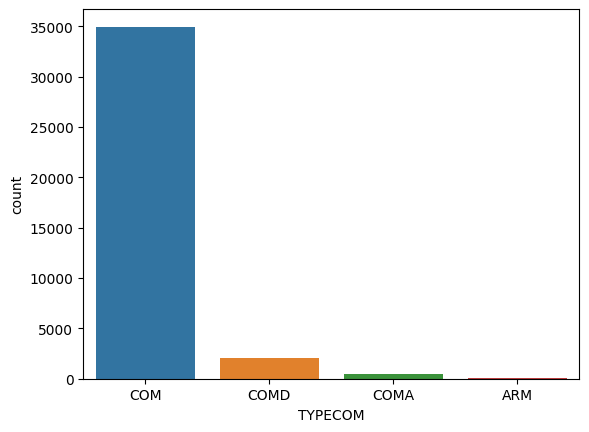

In [28]:
print(df_com.groupby('TYPECOM').count())

sns.countplot(data=df_com,x='TYPECOM');

**Modification du df_com**

*1° dtype modifié*
* COMPARENT astype(str) et suppression .0
* ajout de zero(s) a gauche pour revenir sur un codage 5 caractères

*2° Création d'un df_parent*
* df_parent créé à partir de df_com [['COM','DEP','REG']] ayant COMPARENT=Nan 
* changement des noms de colonne en COM_PARENT,DEP_PARENT,REG_PARENT
* changement du dtype REG_PARENT en str

*3° merge de df_com et df_parent , on_left=('COMPARENT','COM_PARENT')



In [100]:
df_com.COMPARENT[df_com.COMPARENT.isna()==0]=df_com.COMPARENT[df_com.COMPARENT.isna()==0].astype('str') # modification du dtype

df_com.COMPARENT[df_com.COMPARENT.isna()==0]=df_com.COMPARENT[df_com.COMPARENT.isna()==0].apply(lambda x : x.split('.')[0]) # suppression du suffix .0

df_com.COMPARENT[df_com.COMPARENT.isna()==0]=df_com.COMPARENT[df_com.COMPARENT.isna()==0].apply(lambda x : x.zfill(5)) # ajout de zeros a gauche


df_com[df_com.TYPECOM=='COMA'].COMPARENT.head() # vérification



<ipython-input-100-50541e0fc491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com.COMPARENT[df_com.COMPARENT.isna()==0]=df_com.COMPARENT[df_com.COMPARENT.isna()==0].astype('str') # modification du dtype
<ipython-input-100-50541e0fc491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com.COMPARENT[df_com.COMPARENT.isna()==0]=df_com.COMPARENT[df_com.COMPARENT.isna()==0].apply(lambda x : x.split('.')[0]) # suppression du suffix .0
<ipython-input-100-50541e0fc491>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

118     01262
304     01245
714     59545
729     02738
1054    02738
Name: COMPARENT, dtype: object

In [110]:
df_parent=df_com[['LIBELLE','COM','DEP','REG']][df_com.COMPARENT.isna()==1] # création de df_parent => com qui sont de Communes parentes pour les COMA et COMB
df_parent=df_parent.rename({'LIBELLE':'LIBELLE_PARENT','COM':'COM_PARENT','DEP':'DEP_PARENT','REG':'REG_PARENT'},axis=1) # changer le nom des variables
df_parent.REG_PARENT=df_parent.REG_PARENT.astype('str').apply(lambda x : x.split('.')[0]) # modification de la dtype de REG_COMPARENT

df_parent.head()

,LIBELLE_PARENT,COM_PARENT,DEP_PARENT,REG_PARENT
0,L'Abergement-Clémenciat,01001,01,84
1,L'Abergement-de-Varey,01002,01,84
2,Ambérieu-en-Bugey,01004,01,84
3,Ambérieux-en-Dombes,01005,01,84
4,Ambléon,01006,01,84


In [111]:
df_com_enr=df_com.merge(right=df_parent, left_on='COMPARENT',right_on='COM_PARENT',how='left')
df_com_enr[df_com_enr.TYPECOM=='COMA'].head()

,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT,LIBELLE_PARENT,COM_PARENT,DEP_PARENT,REG_PARENT
118,COMA,01120,NaN,NaN,NaN,NaN,0,CORDIEUX,Cordieux,Cordieux,NaN,01262,Montluel,01262,01,84
304,COMA,01324,NaN,NaN,NaN,NaN,0,RIGNAT,Rignat,Rignat,NaN,01245,Bohas-Meyriat-Rignat,01245,01,84
714,COMA,02285,NaN,NaN,NaN,NaN,1,ESCAUFOURT,Escaufourt,Escaufourt,NaN,59545,Saint-Souplet,59545,59,32
729,COMA,02300,NaN,NaN,NaN,NaN,0,FARGNIERS,Fargniers,Fargniers,NaN,02738,Tergnier,02738,02,32
1054,COMA,02630,NaN,NaN,NaN,NaN,0,QUESSY,Quessy,Quessy,NaN,02738,Tergnier,02738,02,32


**COMPARAISON DU JEU DE DONNEES  commune depuis 1943 et commune au 1 janvier 2022**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42177 entries, 0 to 42176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COM         42177 non-null  object
 1   TNCC        42177 non-null  int64 
 2   NCC         42177 non-null  object
 3   NCCENR      42177 non-null  object
 4   LIBELLE     42177 non-null  object
 5   DATE_DEBUT  42177 non-null  object
 6   DATE_FIN    7222 non-null   object
dtypes: int64(1), object(6)
memory usage: 2.3+ MB
None


COM               0
TNCC              0
NCC               0
NCCENR            0
LIBELLE           0
DATE_DEBUT        0
DATE_FIN      34955
dtype: int64


Actif
False     7222
True     34955
Name: COM, dtype: int64


<Axes: xlabel='Actif', ylabel='count'>

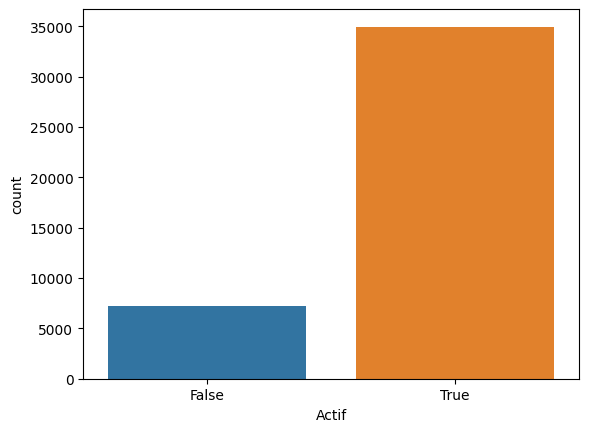

In [33]:
df_com_1943=pd.read_csv('https://www.insee.fr/fr/statistiques/fichier/6051727/communes1943_2022.csv')

print(df_com_1943.info())
print('\n')
print(df_com_1943.isna().sum())
print('\n')

df_com_1943['Actif']=df_com_1943.DATE_FIN.isna()
print(df_com_1943.groupby('Actif').COM.count())
sns.countplot(data=df_com_1943,x='Actif')


* Nous retrouvons bien dans ce jeu de données les 34955 communes COM et ARM du set "commune au 1er janvier 2022".
* A contrario le 7222 commune dont le com est inactif au 1er janvier 2022, ne corresond pas au 2601 communes COMA et COMD du set "commune au 1er janvier 2022".


,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC_x,NCC_x,NCCENR_x,LIBELLE_x,CAN,COMPARENT,TNCC_y,NCC_y,NCCENR_y,LIBELLE_y,DATE_DEBUT,DATE_FIN,Actif
0,COM,01001,84.0,01,01D,012,5.0,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,0108,NaN,5,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,1943-01-01,NaN,True
1,COM,01002,84.0,01,01D,011,5.0,ABERGEMENT DE VAREY,Abergement-de-Varey,L'Abergement-de-Varey,0101,NaN,5,ABERGEMENT DE VAREY,Abergement-de-Varey,L'Abergement-de-Varey,1943-01-01,NaN,True
2,NaN,01003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AMAREINS,Amareins,Amareins,1943-01-01,1974-01-01,False
3,COM,01004,84.0,01,01D,011,1.0,AMBERIEU EN BUGEY,Ambérieu-en-Bugey,Ambérieu-en-Bugey,0101,NaN,1,AMBERIEU,Ambérieu,Ambérieu,1943-01-01,1955-03-31,False
4,COM,01004,84.0,01,01D,011,1.0,AMBERIEU EN BUGEY,Ambérieu-en-Bugey,Ambérieu-en-Bugey,0101,NaN,1,AMBERIEU EN BUGEY,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1955-03-31,NaN,True


Text(0.5, 1.0, 'Ventilation des COM actif')

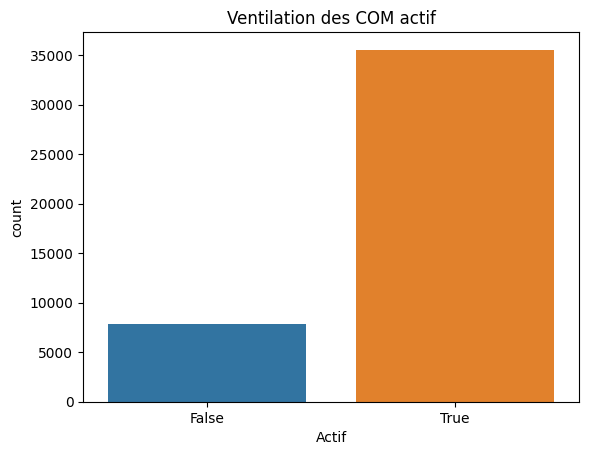

In [43]:
df_test=df_com.merge(right=df_com_1943,on='COM',how='right')

display(df_test.head())
sns.countplot(data=df_test,x='Actif')
plt.title('Ventilation des COM actif')

In [90]:

df_test.groupby('Actif').COM.nunique()




# plt.bar( x=df_test.groupby('Actif').COM.nunique()[0] )

Actif
False     6834
True     34955
Name: COM, dtype: int64

In [72]:
sns.countplot(data=df_test.groupby('Actif').COM.unique() x='Actif')



SyntaxError: ignored

**TRANSFORMATION DE LA BASE DF_COM ENRICHIE**

***variables conservées***

TYPECOM	 :  Type de commune <br>
COM	 :	Code commune<br>
REG	 :	Code région <br>
DEP	 :	Code département <br>
LIBELLE	:	Nom en clair (typographie riche) avec article <br>



***variables supprimées*** 

CTCD	:	Code de la collectivité ayant les compétences  départementales <br>
TNCC :	Type de nom en clair <br>
NCC	:	Nom en clair (majuscules) <br>
NCCENR	: 	Nom en clair (typographie riche) <br>
CAN	:	Code canton  <br>
COMPARENT	:	Code de la commune parente <br>
ARR	:	Code arrondissement <br>


***Changement de Dtype***

la dtype de la variable REG est changer en objet


***Changement nom de la variable***

la nom de la variable LIBELLE est changé en LIBELLE_COM




In [ ]:
df_com['REG']=df_com['REG'].astype(str) # changement de la dtype de REG

df_com.REG=df_com.REG.astype(str).apply(lambda x : x.split('.')[0]) # suppression de la décimale

df_com=df_com[['TYPECOM','COM','REG','DEP','LIBELLE']] # suppression/conservation de variables

df_com=df_com.rename({'LIBELLE':'LIBELLE_COM'},axis=1) # changement du nom de la variable LIBELLE_COM


In [ ]:
df_com.REG=df_com.REG.replace({'nan':np.nan})  # modification des 'nan' en NaN

In [ ]:
print(df_com.info()) # vérification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37601 entries, 0 to 37600
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPECOM      37601 non-null  object
 1   COM          37601 non-null  object
 2   REG          35000 non-null  object
 3   DEP          35000 non-null  object
 4   LIBELLE_COM  37601 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB
None


**DEUXIEME ETAPE : CREATION DU NIVEAU DEPARTEMENT**

Page web de référence : https://www.insee.fr/fr/information/6051727

Source de référence : https://www.insee.fr/fr/statistiques/fichier/6051727/departement_2022.csv

***Variables :***

DEP	:	Code département <br>
REG	:	Code région <br>
CHEFLIEU :	Code de la commune chef-lieu <br>
TNCC	:	Type de nom en clair <br>
NCC	:	Nom en clair (majuscules) <br>
NCCENR	:	Nom en clair (typographie riche) <br>
LIBELLE	:	Nom en clair (typographie riche) avec article
Régions <br>


In [ ]:
df_dep=pd.read_csv('https://www.insee.fr/fr/statistiques/fichier/6051727/departement_2022.csv')

**Premières analyses**

In [ ]:
print(df_dep.info())
print(df_dep.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DEP       101 non-null    object
 1   REG       101 non-null    int64 
 2   CHEFLIEU  101 non-null    object
 3   TNCC      101 non-null    int64 
 4   NCC       101 non-null    object
 5   NCCENR    101 non-null    object
 6   LIBELLE   101 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB
None
  DEP  REG CHEFLIEU  TNCC                      NCC                   NCCENR  \
0  01   84    01053     5                      AIN                      Ain   
1  02   32    02408     5                    AISNE                    Aisne   
2  03   84    03190     5                   ALLIER                   Allier   
3  04   93    04070     4  ALPES DE HAUTE PROVENCE  Alpes-de-Haute-Provence   
4  05   93    05061     4             HAUTES ALPES             Hautes-Alpes   

                   LIBEL

*   La base insee departement contient au 1er janvier 2022 101 entrées

**Transformation de la df_dep**

***Variables conservé :***

DEP : Code département <br>
LIBELLE : Nom en clair (typographie riche) avec article Régions<br>

**Variables supprimées**<br>
REG : Code région<br>
CHEFLIEU : Code de la commune chef-lieu<br>
TNCC : Type de nom en clair<br>
NCC : Nom en clair (majuscules)<br>
NCCENR : Nom en clair (typographie riche)<br>

**Nom de variable changé**<br>

le nom de la variable LIBELLE est changé en LIBELLE_DEP




In [ ]:
df_dep=df_dep[['DEP','LIBELLE']] # selection/suppression de variables
df_dep=df_dep.rename({'LIBELLE':'LIBELLE_DEP'},axis=1) # modification du nom de la variable LIBELLE en LIBELLE_DEP
df_dep.info() # vérification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DEP          101 non-null    object
 1   LIBELLE_DEP  101 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


**TROISIEME ETAPE : CREATION DU NIVEAU REGION**

Page web de référence : https://www.insee.fr/fr/information/6051727

Source de référence : https://www.insee.fr/fr/statistiques/fichier/6051727/region_2022.csv

***Variables :*** <br>
REG	:	Code région <br>
CHEFLIEU :	Code de la commune chef-lieu <br>
TNCC	:	Type de nom en clair <br>
NCC	:	Nom en clair (majuscules) <br>
NCCENR	:	Nom en clair (typographie riche) <br>
LIBELLE	:	Nom en clair (typographie riche) avec article
Régions <br>


In [ ]:
df_reg=pd.read_csv('https://www.insee.fr/fr/statistiques/fichier/6051727/region_2022.csv')

**Premières analyses**


In [ ]:
print(df_reg.info())
print(df_reg.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   REG       18 non-null     int64 
 1   CHEFLIEU  18 non-null     object
 2   TNCC      18 non-null     int64 
 3   NCC       18 non-null     object
 4   NCCENR    18 non-null     object
 5   LIBELLE   18 non-null     object
dtypes: int64(2), object(4)
memory usage: 992.0+ bytes
None
   REG CHEFLIEU  TNCC         NCC      NCCENR     LIBELLE
0    1    97105     3  GUADELOUPE  Guadeloupe  Guadeloupe
1    2    97209     3  MARTINIQUE  Martinique  Martinique
2    3    97302     3      GUYANE      Guyane      Guyane
3    4    97411     0  LA REUNION  La Réunion  La Réunion
4    6    97608     0     MAYOTTE     Mayotte     Mayotte


**modifier la base df_reg**

***Variables conservées*** <br>
REG : Code région <br>
LIBELLE : Nom en clair (typographie riche) avec article Régions<br>

***Dtype modidié*** <br>
le dtype de REG est modifié en objet

***Nom de variable modifié***<br>
le nom de la variable LIBELLE est modifié en LIBELLE_REG

***Variables supprimées***<br>
CHEFLIEU : Code de la commune chef-lieu<br>
TNCC : Type de nom en clair<br>
NCC : Nom en clair (majuscules)<br>
NCCENR : Nom en clair (typographie riche)<br>

In [ ]:
df_reg=df_reg[['REG','LIBELLE']] # selection/suppresion de variables

df_reg.REG=df_reg.REG.astype('str') # dtype de REG modifié en object
df_reg=df_reg.rename({'LIBELLE':'LIBELLE_REG'},axis=1)

df_reg.info() # vérification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   REG          18 non-null     object
 1   LIBELLE_REG  18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


<ipython-input-279-14e4f1757674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg.REG=df_reg.REG.astype('str') # dtype de REG modifié en object


**coordonnées GPS**


source officielle reactulisée : Base officielle des codes postaux et des communes (BOCP)

page de référence : https://datanova.laposte.fr/explore/dataset/laposte_hexasmal/information/?disjunctive.code_commune_insee&disjunctive.nom_de_la_commune&disjunctive.code_postal&disjunctive.ligne_5

dataset de référence : https://datanova.laposte.fr/api/explore/v2.1/catalog/datasets/laposte_hexasmal/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B

**Variables :**

* Code_commune_INSEE: code_commune_insee[text]<br>
* Nom_commune: nom_de_la_commune[text]<br>
* Code_postal: code_postal[text]<br>
* Ligne_5: ligne_5[text] Ligne 5 dans l’écriture de l’adresse, utilisée  notamment pour préciser l’ancienne commune ou le lieu-dit<br>
* Libellé_d_acheminement: libelle_d_acheminement[text]<br>
* coordonnees_geographiques: coordonnees_geographiques[text]<br>


**Premières analyses**

In [ ]:
print(df_gps.info())
df_gps=df_gps.sort_values(by='Code_commune_INSEE')
display(df_gps.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39193 entries, 4039 to 15707
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Code_commune_INSEE         39193 non-null  object
 1   Nom_commune                39193 non-null  object
 2   Code_postal                39193 non-null  int64 
 3   Ligne_5                    4696 non-null   object
 4   Libellé_d_acheminement     39193 non-null  object
 5   coordonnees_geographiques  39193 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB
None


,Code_commune_INSEE,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,coordonnees_geographiques
4039,01001,L ABERGEMENT CLEMENCIAT,1400,NaN,L ABERGEMENT CLEMENCIAT,"46.153721024, 4.925850148"
31363,01002,L ABERGEMENT DE VAREY,1640,NaN,L ABERGEMENT DE VAREY,"46.009605679, 5.428087796"
17384,01004,AMBERIEU EN BUGEY,1500,NaN,AMBERIEU EN BUGEY,"45.961048852, 5.372275427"
31364,01005,AMBERIEUX EN DOMBES,1330,NaN,AMBERIEUX EN DOMBES,"45.99616357, 4.911967138"
31365,01006,AMBLEON,1300,NaN,AMBLEON,"45.749886304, 5.594584599"


In [ ]:
print("nombre de modalité de la variable code_commune_insee :",len(df_gps.Code_commune_INSEE.unique()))
print("nombre de modalité de la variable coordonnees_geographiques :",len(df_gps.coordonnees_geographiques.unique()))


nombre de modalité de la variable code_commune_insee : 35079
nombre de modalité de la variable coordonnees_geographiques : 35079


**Modifier le set df_gps**

*Variables conservées :*
* Code_commune_INSEE:
* Code_postal

*variables créées:* 

* latitude : a partir de coordonnees_geographiques
* longitude : a partir de  coordonnees_geographiques

*Nom de variable à modifier*

* Code_commune_INSEE en COM

*Dtype à modifier*

* dtype de Code_postal modifié en str

*Valeur à modifier*

* certaines valeurs de la variable Code_postal doivent être corrigées



In [ ]:
df_gps['latitude']=df_gps.coordonnees_geographiques.apply(lambda row : row.split(',')[0])
df_gps['longitude']=df_gps.coordonnees_geographiques.apply(lambda row : row.split(' ')[1])

In [ ]:
df_gps=df_gps[['Code_commune_INSEE','Code_postal','latitude','longitude']]
df_gps=df_gps.rename({'Code_commune_INSEE':'COM'},axis=1)
df_gps.Code_postal=df_gps.Code_postal.astype(str)

In [ ]:
print(df_gps.info())
display(df_gps.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39193 entries, 4039 to 15707
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   COM          39193 non-null  object
 1   Code_postal  39193 non-null  object
 2   latitude     39193 non-null  object
 3   longitude    39193 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB
None


,COM,Code_postal,latitude,longitude
4039,01001,1400,46.153721024,4.925850148
31363,01002,1640,46.009605679,5.428087796
17384,01004,1500,45.961048852,5.372275427
31364,01005,1330,45.99616357,4.911967138
31365,01006,1300,45.749886304,5.594584599


In [ ]:
df_test=df.copy()

df_test=df_test.merge(right=df_gps, on='COM', how='left')

print(df_test.info())
print(df_test.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EU_circo                40890 non-null  object
 1   code_région             40890 non-null  object
 2   nom_région              40890 non-null  object
 3   chef.lieu_région        40890 non-null  object
 4   numéro_département      40890 non-null  object
 5   nom_département         40890 non-null  object
 6   préfecture              40890 non-null  object
 7   numéro_circonscription  40890 non-null  object
 8   nom_commune             40890 non-null  object
 9   codes_postaux           40890 non-null  object
 10  COM                     40890 non-null  object
 11  Code_postal             38730 non-null  object
 12  latitude                38730 non-null  object
 13  longitude               38730 non-null  object
dtypes: object(14)
memory usage: 4.7+ MB
None
EU_circo     

In [ ]:
df_test['GPS']=df_test.latitude+','+df_test.longitude
print("nombre de coordonnées uniques : ", len(df_test.GPS.unique()))


nombre de coordonnées uniques :  34564


***Création de la base au niveau communal***

**CREATION DE LA BASE CODE GEO**

In [ ]:
code_geo=df_com.copy() # création de la base à partir du niveau commune

**Ajout du niveau départemental**

In [ ]:
code_geo=code_geo.merge(right=df_dep,on='DEP',how='left') # ajout du niveau département

**Analyse du merge niveau départemental**

In [ ]:
code_geo.info() # vérification

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37601 entries, 0 to 37600
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPECOM      37601 non-null  object
 1   COM          37601 non-null  object
 2   REG          35000 non-null  object
 3   DEP          35000 non-null  object
 4   LIBELLE_COM  37601 non-null  object
 5   LIBELLE_DEP  35000 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [ ]:
print("nombre d'enregistrements : ",code_geo.shape[0])
print("Nombre d'enregistrements correctement renseignés : ",code_geo[code_geo.isna().any(axis=1)==0].shape[0])
print("Nombre d'enregistrements avec NaN",code_geo.isna().any(axis=1).sum())
print("TYPECOM pour lesquels, il y des NaN : ",code_geo.TYPECOM[code_geo.isna().any(axis=1)==1].unique())

nombre d'enregistrements :  37601
Nombre d'enregistrements correctement renseignés :  35000
Nombre d'enregistrements avec NaN 2601
TYPECOM pour lesquels, il y des NaN :  ['COMD' 'COMA']


Conformément à la variable DEP de div_com ,on obtient 35 000 enregistrements correctement renseignés 


Les enregistrements avec NaN ont pour modalité sur la variable TYPECOM : 
* COMA :Commune associée <br>
* COMD :Commune déléguée <br>

***Ajout du niveau régional***

In [ ]:
code_geo=code_geo.merge(right=df_reg, on='REG',how='left')

***Analyse du merge du niveau régional***

In [ ]:
code_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37601 entries, 0 to 37600
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPECOM      37601 non-null  object
 1   COM          37601 non-null  object
 2   REG          35000 non-null  object
 3   DEP          35000 non-null  object
 4   LIBELLE_COM  37601 non-null  object
 5   LIBELLE_DEP  35000 non-null  object
 6   LIBELLE_REG  35000 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


In [ ]:
print("nombre d'enregistrements : ",code_geo.shape[0])
print("Nombre d'enregistrements correctement renseignés : ",code_geo[code_geo.isna().any(axis=1)==0].shape[0])
print("Nombre d'enregistrements avec NaN",code_geo.isna().any(axis=1).sum())
print("TYPECOM pour lesquels, il y des NaN : ",code_geo.TYPECOM[code_geo.isna().any(axis=1)==1].unique())

nombre d'enregistrements :  37601
Nombre d'enregistrements correctement renseignés :  35000
Nombre d'enregistrements avec NaN 2601
TYPECOM pour lesquels, il y des NaN :  ['COMD' 'COMA']


Conformément à la variable REG de div_com ,on obtient 35 000 enregistrements correctement renseignés 


Les enregistrements avec NaN ont pour modalité sur la variable TYPECOM : 
* COMA :Commune associée <br>
* COMD :Commune déléguée <br>

**Ajout des coordonnées GPS**


In [ ]:
geo=code_geo.copy()

geo=geo.merge(right=df_gps, on='COM',how='left')

display(geo.head())
print(geo.info())
print(geo.isna().sum())

,TYPECOM,COM,REG,DEP,LIBELLE_COM,LIBELLE_DEP,LIBELLE_REG,Code_postal,latitude,longitude
0,COM,01001,84,01,L'Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes,1400,46.153721024,4.925850148
1,COM,01002,84,01,L'Abergement-de-Varey,Ain,Auvergne-Rhône-Alpes,1640,46.009605679,5.428087796
2,COM,01004,84,01,Ambérieu-en-Bugey,Ain,Auvergne-Rhône-Alpes,1500,45.961048852,5.372275427
3,COM,01005,84,01,Ambérieux-en-Dombes,Ain,Auvergne-Rhône-Alpes,1330,45.99616357,4.911967138
4,COM,01006,84,01,Ambléon,Ain,Auvergne-Rhône-Alpes,1300,45.749886304,5.594584599


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43121 entries, 0 to 43120
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPECOM      43121 non-null  object
 1   COM          43121 non-null  object
 2   REG          38937 non-null  object
 3   DEP          38937 non-null  object
 4   LIBELLE_COM  43121 non-null  object
 5   LIBELLE_DEP  38937 non-null  object
 6   LIBELLE_REG  38937 non-null  object
 7   Code_postal  41084 non-null  object
 8   latitude     41084 non-null  object
 9   longitude    41084 non-null  object
dtypes: object(10)
memory usage: 3.6+ MB
None
TYPECOM           0
COM               0
REG            4184
DEP            4184
LIBELLE_COM       0
LIBELLE_DEP    4184
LIBELLE_REG    4184
Code_postal    2037
latitude       2037
longitude      2037
dtype: int64


**Analyse du merge des coordonnées GPS** 

In [ ]:
print("Nombre d'enregistrements correctement renseignés : ",code_geo[code_geo.isna().any(axis=1)==0].shape[0])
print("Nombre d'enregistrements avec NaN",code_geo.isna().any(axis=1).sum())
print("TYPECOM pour lesquels, il y des NaN : ",code_geo.TYPECOM[code_geo.isna().any(axis=1)==1].unique())

Nombre d'enregistrements correctement renseignés :  38926
Nombre d'enregistrements avec NaN 4195
TYPECOM pour lesquels, il y des NaN :  ['COMD' 'COM' 'COMA']


In [ ]:
code_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43121 entries, 0 to 43120
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPECOM      43121 non-null  object
 1   COM          43121 non-null  object
 2   REG          43121 non-null  object
 3   DEP          38937 non-null  object
 4   LIBELLE_COM  43121 non-null  object
 5   LIBELLE_DEP  38937 non-null  object
 6   LIBELLE_REG  38937 non-null  object
 7   Code_postal  41084 non-null  object
 8   latitude     41084 non-null  object
 9   longitude    41084 non-null  object
dtypes: object(10)
memory usage: 3.6+ MB
